<a href="https://colab.research.google.com/github/rafaelmattos/Introducao-a-Ciencias-de-Dados/blob/main/Aula4%20-%20knn_nb_lr_revisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Revisão: KNN, NB e LR </h1>

Edesio Alcobaça (edesio@usp.br)<br>


MBA em Ciência de Dados <br>
Universidade de São Paulo, São Carlos, Brasil<br>
Copyright (c) 2024

<h2> 1) K-Nearest Neighbors (KNN) </h2>

<h3> 1.1) Intuição: </h3>

<img src="https://miro.medium.com/v2/resize:fit:810/0*rc5_e6-6AHzqppcr" width="400">
<center>Problema binário com dois atributos.</center>

<h4> Tipos de Distâcias </h4>

Existem diversos tipos de distâncias que podem ser utilizadas.
É importante entender se a distância faz sentido para o seu problema.

Umas das distâncias mais conhecidas são as distâncias de Minkowski.
* Dado espaço vetorial com norma podemos definir a distância de **Minkowski** como:
\begin{equation*}
dist( \vec{u}, \vec{v} ) = \Big( \sum_{i=1}^m \left | u_i - v_i \right |^p \Big)^{(\frac{1}{p})}
\end{equation*}


* Para $p = 1$ temos a distância de **Manhattan**:
\begin{equation*}
dist(\vec{u}, \vec{v}) = \sum_{i=1}^m \left | u_i - v_i \right |
\end{equation*}

* Para $p = 2$ temos a distância **Euclidiana**:
\begin{equation*}
dist(\vec{u}, \vec{v}) = \Big( \sum_{i=1}^m \left | u_i - v_i \right |^2 \Big)^{(\frac{1}{2})} = \sqrt{ \sum_{i=1}^m (u_i - v_i)^2}
\end{equation*}

* Para $r = \inf$ temos a distância de **Chebyshev** ou norma máxima:
\begin{equation*}
dist( \vec{u}, \vec{v} ) = \max_{i = 1,~...~, m}(| u_i - v_i |)
\end{equation*}

* Cosseno
\begin{equation*}
dist(\vec{u}, \vec{v}) = cos(\theta) = \frac{ \vec{u} \cdot \vec{v} }{\| \vec{u} \| \| \vec{v} \|} = \frac{ \sum_{i=1}^{m} u_i v_i }{ \sqrt{\sum_{i=1}^{m} u_i^2} \sqrt{\sum_{i=1}^{m} v_i^2} }
\end{equation*}


Observações:
* $u$ e $v$ podem ser vistos como exemplos de um conjunto de dados
* $m$ o número de atributos preditivos


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*BKcnB65yMzjbRAy7FQwn3w.png">


<h3> 1.2) Como Usar </h3>

Accuracy: 0.83


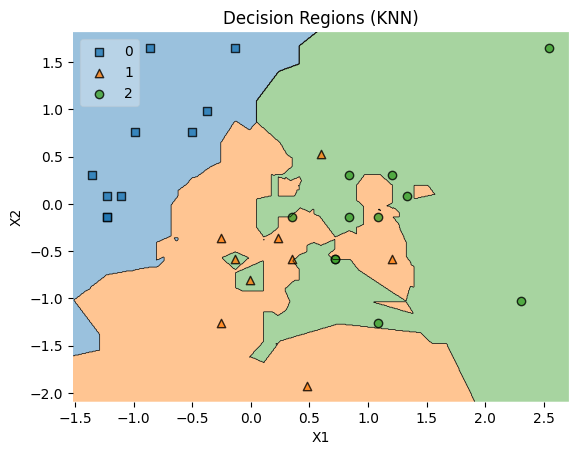

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

# Scaling nos dados
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# aplicar o algoritmo
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")

plot_decision_regions(X_test_std, y_test, clf=model, legend=2, zoom_factor=6.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f"Decision Regions (KNN)")
plt.show()

<h3> 1.3) Aspectos Positivos e Negativos </h3>

Positivos:
* O conceito é simples e fácil de ser implementado
* É aplicavel mesmo para problemas complexos
* É naturalmente incremental
* Constroi aproximações locais da função objetivo, pode ser vantajoso quando a função é muito complexa

Negativos:
* Não temos uma representção compacta, pois não há um modelo
* Predição pode ser custosa
* É afetado por atributos redundantes e ruído
* Problema para lidar com alta dimensionalidade

<h3> 1.3 Dicas </h3>

Evite usar valores de $k$ que levem a um cenário de indecisão.

* Evite usar $k \leq $ número de classes ou multiplo de k
* Lembre-se sempre de colocar os dados em uma mesma escala
* Se possível, remova ruído ou evite usar com dados ruidosos


<h2> 2) Naive Bayes (NB) </h2>

<h3> 1.2) Intuição </h3>

O **Naive Bayes** (NB) pertence a uma classe de métodos em Aprendizado de Máquina (AM) conhecidos como **"Métodos Probabilistícos"**. Tais algoritmos de AM supervisionado tem como inspiração a aplicação do Teorema de Bayes, fazendo uma suposição 'naive' de independência entre os atributos preditivos $\textbf{X}$. Isso significa que supomos que **não há dependência entre dois ou mais atributos** no conjunto de dados.

Segue abaixo o Teorema de Bayes:

\begin{equation*}
P(A | B) = \frac{P(B | A) P(A)}{P(B)}
\end{equation*}


* $P(A|B)$ é chamado de `posterior`
* $P(B|A)$ é chamado de `likelihood`
* $P(A)$ é chamado de `prior`
* $P(B)$ é chamado de `evidence`


Logo:

\begin{equation*}
posterior = \frac{likelihood \times prior}{evidence}
\end{equation*}


<h3> 2.2) Como Usar </h3>

Accuracy: 0.9


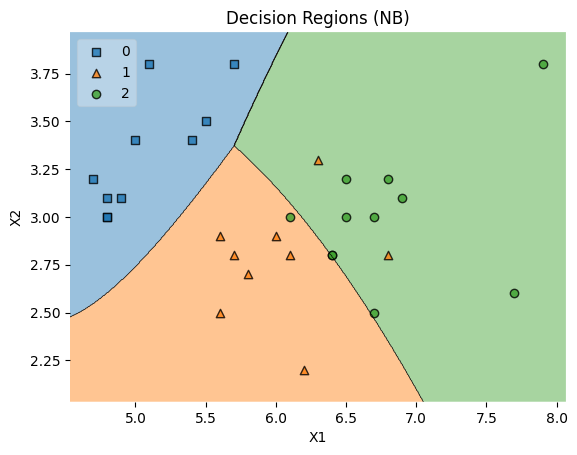

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")

plot_decision_regions(X_test, y_test, clf=model, legend=2, zoom_factor=6.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f"Decision Regions (NB)")
plt.show()

### 1.4. Aspectos Positivos e Negativos

Positivos:
* Fácil de implementar
* Fácil de implementar de forma incremental
* Robusto na presença de ruído
* O desempenho não decresce na presença de atributos irrelevantes

Negativos:
* Independência de atributos não ocorre em muitos problemas reais
* Necessidade de supor distribuição dos dados

### 1.5. Dicas

* Se os dados são Gaussianos então uma boa alternativa é o **Gaussian Naive Bayes**
  * É possível testar normalidade dos dados, veja : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
* Se os dados forem categóricos uma alternativa é o **Categorical Naive Bayes**
* Se os dados forem desbalanceados uma alternativa é o **Complement Naive Bayes**
    * O problema com desbalanceamento também pode mitigado ajustando o peso dos priors
* Se os seus dados forem binários uma alternativa pode ser o **Bernoulli Naive Bayes**
* Se os seus dados forem textuais um bom baseline é o **Multinomial Naive Bayes**




* Lembre-se de discretizar os dados para usar o **Categorical Naive Bayes**
    * Essa ferramenta é interessante: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
* Lembre-se que os priors podem influenciar (principalmente em dados desbalanceados)

<h2> 3) Logistic Regression (LR) </h2>

<h3> 3.2) Intuição </h3>

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png" width="700"><br>
<center>Problema binário com dois atributos. Fonte: analyticsvidhya.</center>

<h3> 3.2) Como Usar </h3>

Accuracy: 0.9


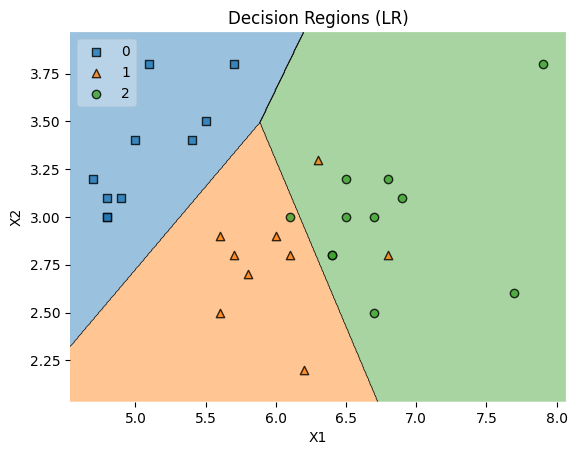

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = round(accuracy_score(y_test, y_pred), 2)
print(f"Accuracy: {acc}")

plot_decision_regions(X_test, y_test, clf=model, legend=2, zoom_factor=6.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f"Decision Regions (LR)")
plt.show()

<h2> 4) Comparando KNN, NB e LR </h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

def plot(X, y, title="Title"):
    plt.title(title, fontsize='small')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=25, edgecolor='k')
    plt.show()

n_samples = 1000

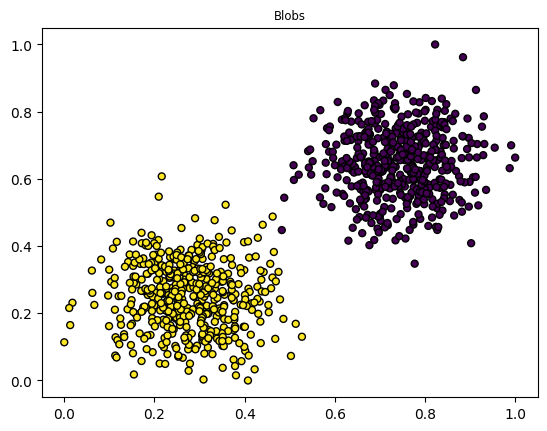

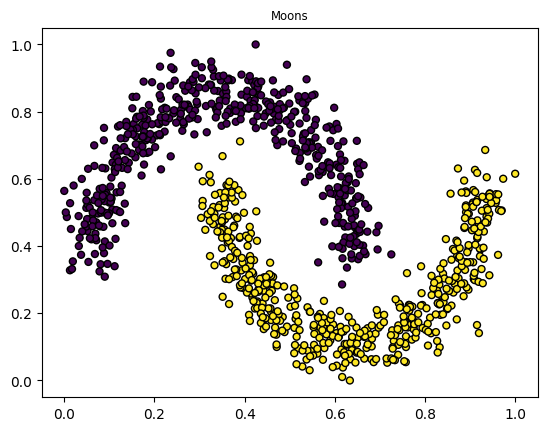

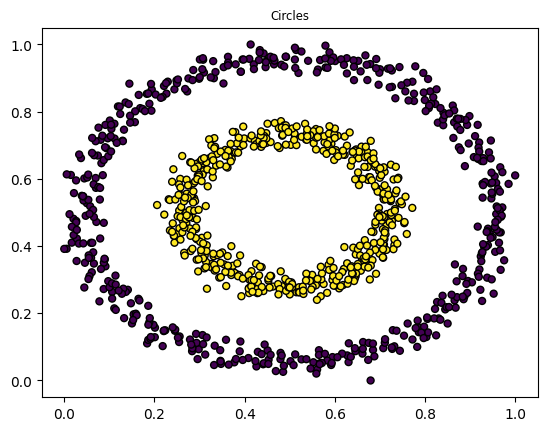

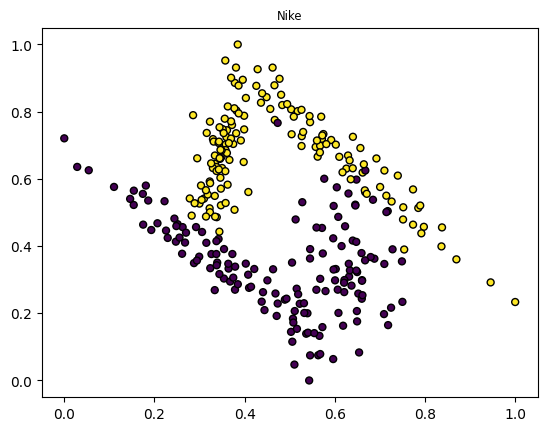

In [ ]:
# gerar os datasets toy

n_samples = 1000

# gerar dados blobs
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, random_state=3)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Blobs")
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X, y, test_size = 0.2, random_state = 42)


# # gerar dados blobs
# X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=[1, 2], random_state=3)
# X = MinMaxScaler().fit_transform(X)
# plot(X, y, "Noise Blobs")
# X_train_blobsn, X_test_blobsn, y_train_blobsn, y_test_blobsn = train_test_split(X, y, test_size = 0.2, random_state = 42)


# gerar dados moons
X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=3)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Moons")
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X, y, test_size = 0.2, random_state = 42)


X, y = make_circles(n_samples=n_samples, factor=.5, noise=.05)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Circles")
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size = 0.2, random_state = 42)


# dado qualquer de classificação
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights = (0.5, 0.5),
    random_state=123
)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Nike")
X_train_nike, X_test_nike, y_train_nike, y_test_nike = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h3> 4.1) Blobs </h3>

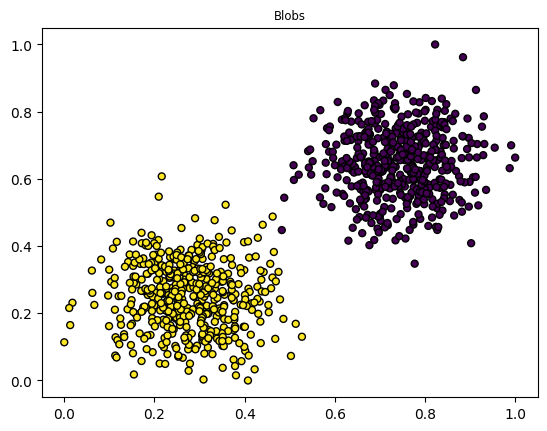

In [ ]:
# gerar dados blobs
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, random_state=3)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Blobs")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

Evaluating model from knn ...
Accuracy (knn): 1.0


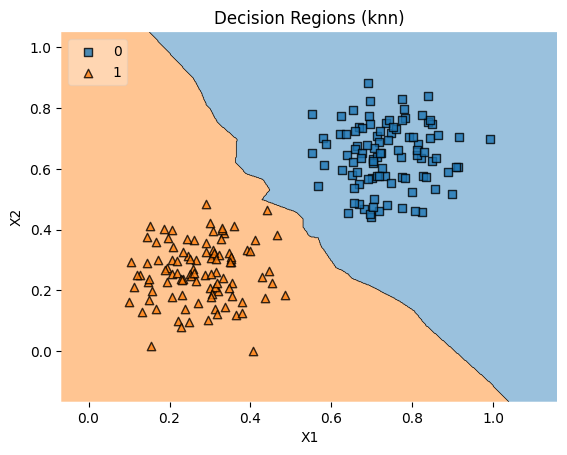

Evaluating model from NB ...
Accuracy (NB): 1.0


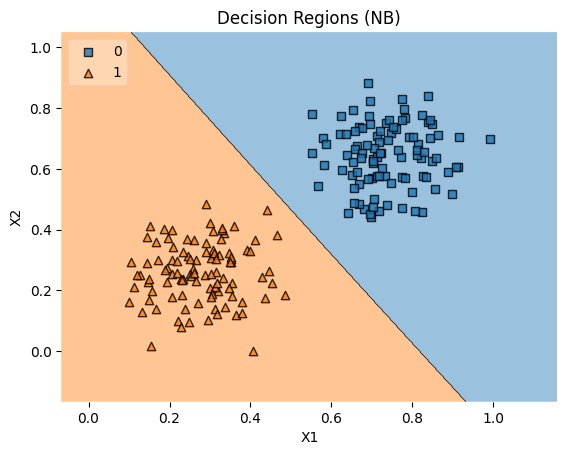

Evaluating model from RL ...
Accuracy (RL): 1.0


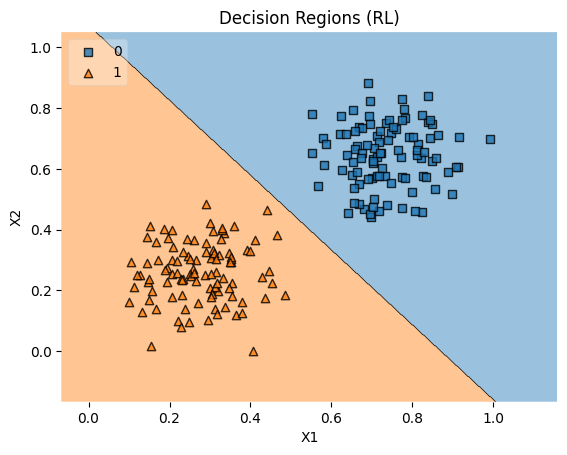

In [ ]:
models = [
    ('knn', KNeighborsClassifier(n_neighbors=3, metric= "euclidean")),
    ('NB', GaussianNB()),
    ('RL', LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating model from {name} ...")

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {round(acc, 2)}")

    plot_decision_regions(X_test, y_test, clf=model, legend=2, zoom_factor=6.0)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Decision Regions ({name})")
    plt.show()

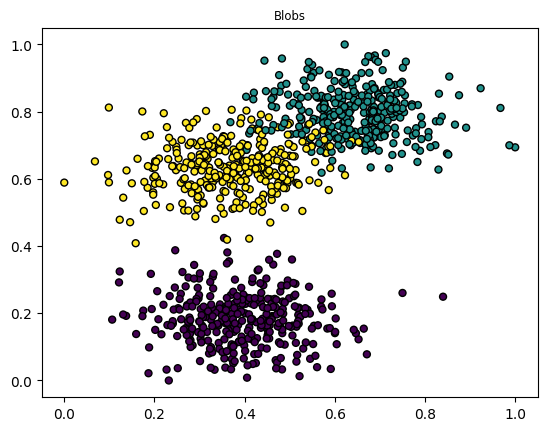

In [ ]:
# gerar dados blobs
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, random_state=2)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Blobs")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

Evaluating model from knn ...
Accuracy (knn): 0.97


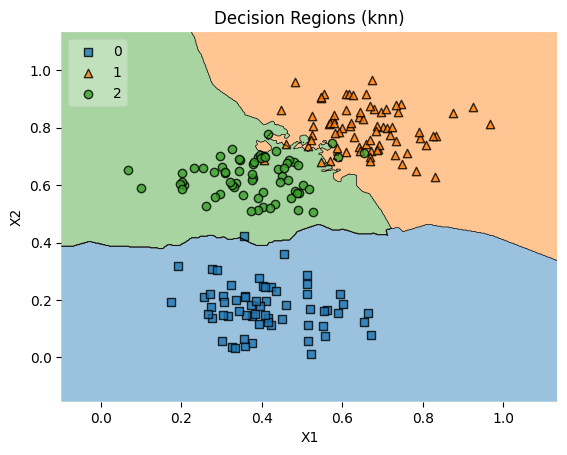

Evaluating model from NB ...
Accuracy (NB): 0.96


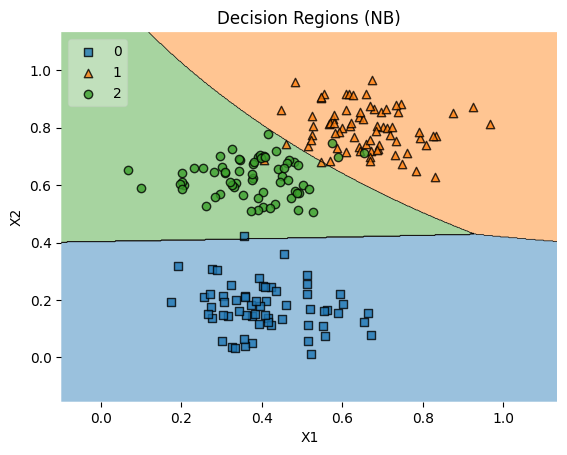

Evaluating model from RL ...
Accuracy (RL): 0.97


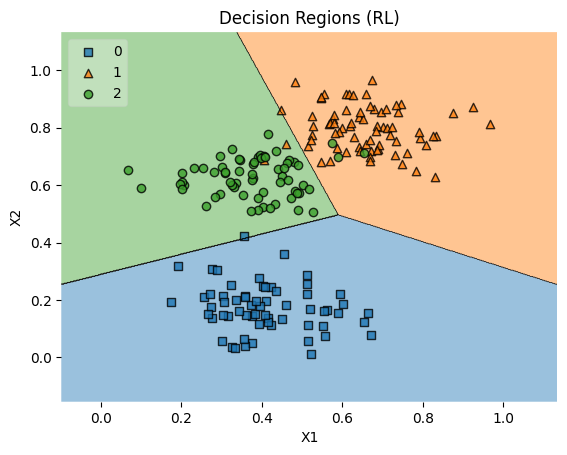

In [ ]:
models = [
    ('knn', KNeighborsClassifier(n_neighbors=3, metric= "euclidean")),
    ('NB', GaussianNB()),
    ('RL', LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating model from {name} ...")

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {round(acc, 2)}")

    plot_decision_regions(X_test, y_test, clf=model, legend=2, zoom_factor=6.0)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Decision Regions ({name})")
    plt.show()

<h3> 4.2) Moons </h3>

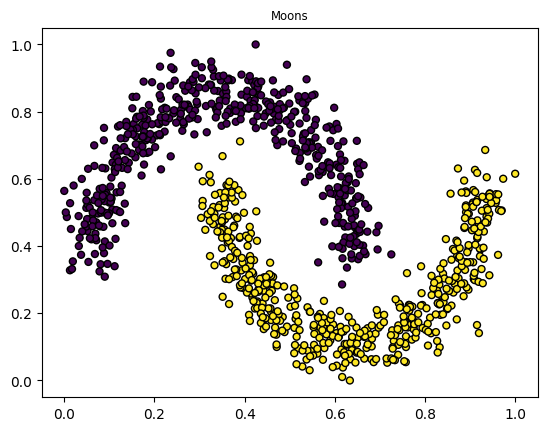

In [ ]:
X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=3)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Moons")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Evaluating model from knn ...
Accuracy (knn): 1.0


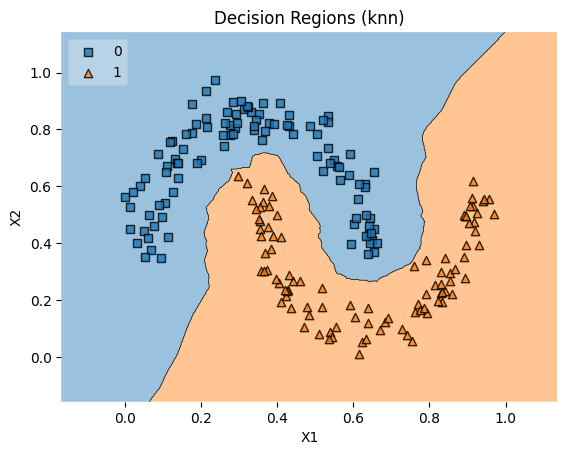

Evaluating model from NB ...
Accuracy (NB): 0.85


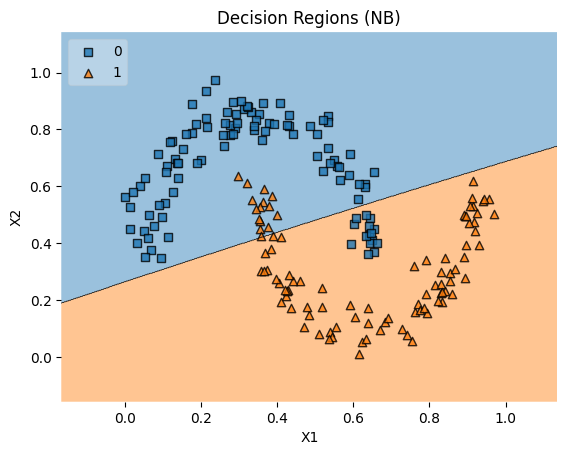

Evaluating model from RL ...
Accuracy (RL): 0.85


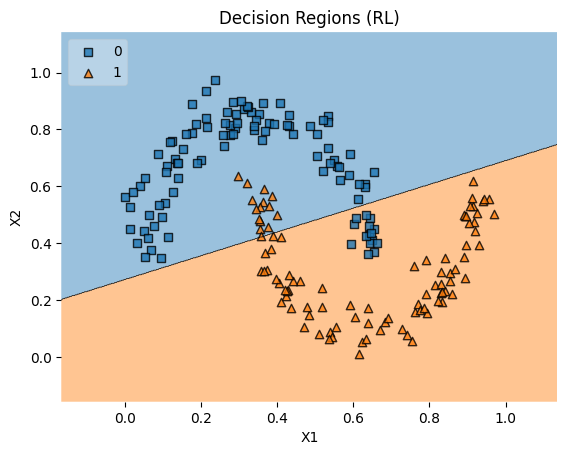

In [ ]:
models = [
    ('knn', KNeighborsClassifier(n_neighbors=3, metric= "euclidean")),
    ('NB', GaussianNB()),
    ('RL', LogisticRegression(max_iter = 1000))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating model from {name} ...")

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {round(acc, 2)}")

    plot_decision_regions(X_test, y_test, clf=model, legend=2, zoom_factor=6.0)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Decision Regions ({name})")
    plt.show()

<h3> 4.3) Circles </h3>

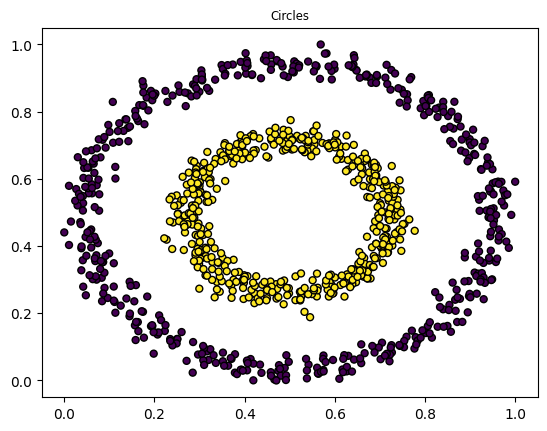

In [ ]:
X, y = make_circles(n_samples=n_samples, factor=.5, noise=.05)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Circles")
#plt.hist(X[:, 0])
#plt.hist(X[:, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Evaluating model from knn ...
Accuracy (knn): 1.0


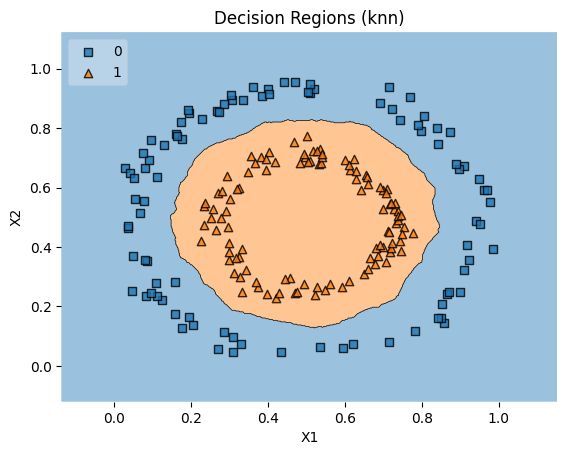

Evaluating model from NB ...
Accuracy (NB): 1.0


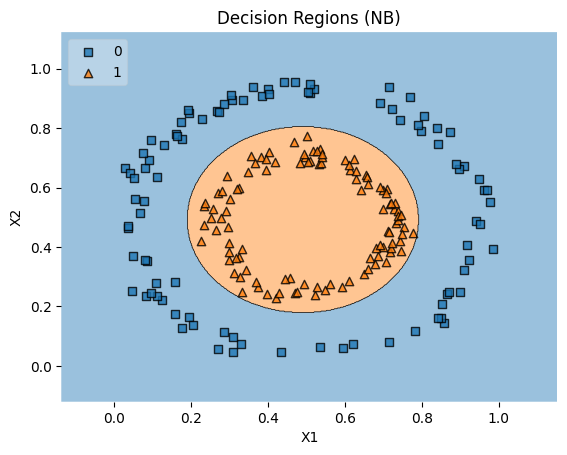

Evaluating model from RL ...
Accuracy (RL): 0.36


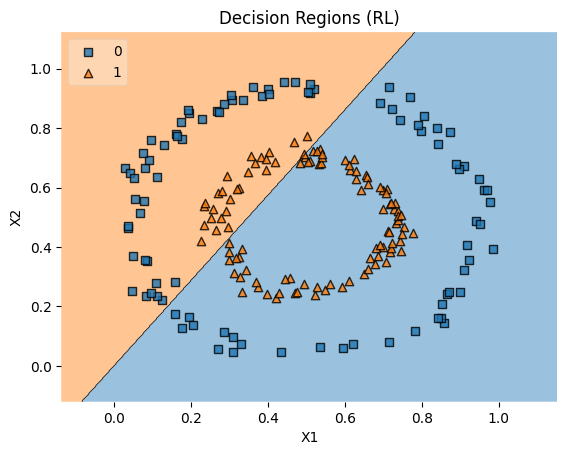

In [ ]:
models = [
    ('knn', KNeighborsClassifier(n_neighbors=3, metric= "euclidean")),
    ('NB', GaussianNB()),
    ('RL', LogisticRegression(max_iter = 1000))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating model from {name} ...")

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {round(acc, 2)}")

    plot_decision_regions(X_test, y_test, clf=model, legend=2, zoom_factor=6.0)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Decision Regions ({name})")
    plt.show()

<h3> 4.4) Nike </h3>

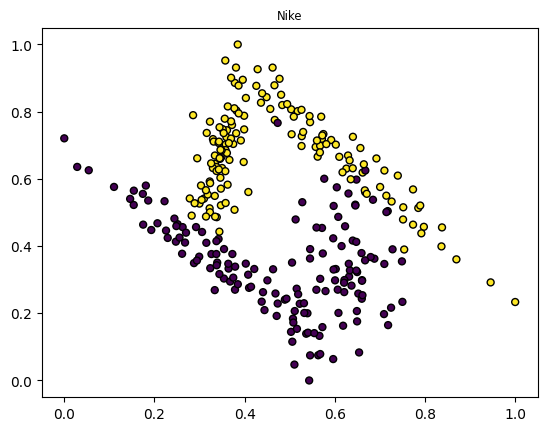

In [ ]:
# dado qualquer de classificação
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights = (0.5, 0.5),
    random_state=123
)
X = MinMaxScaler().fit_transform(X)
plot(X, y, "Nike")
# plt.hist(X[:, 0])
# plt.hist(X[:, 1])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Evaluating model from knn ...
Accuracy (knn): 0.98


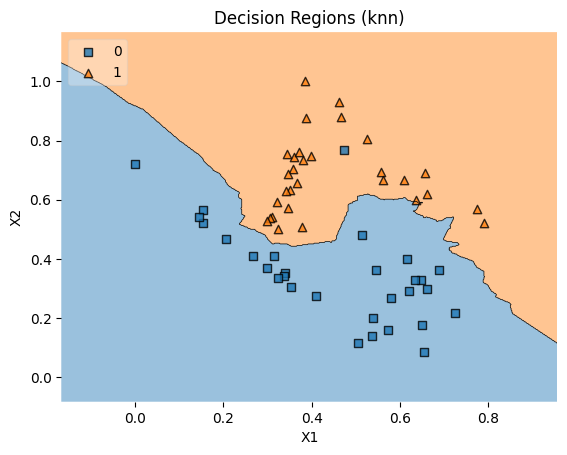

Evaluating model from NB ...
Accuracy (NB): 0.9


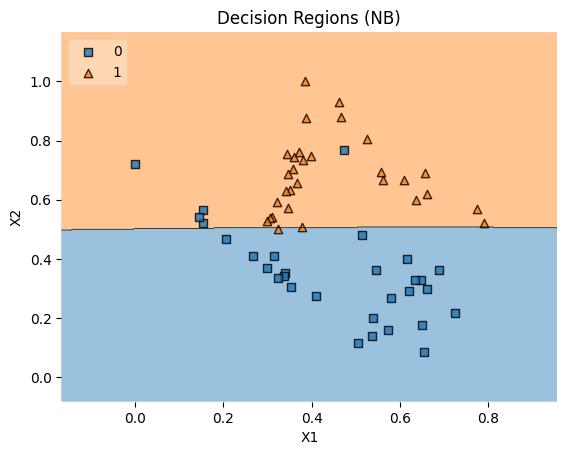

Evaluating model from RL ...
Accuracy (RL): 0.9


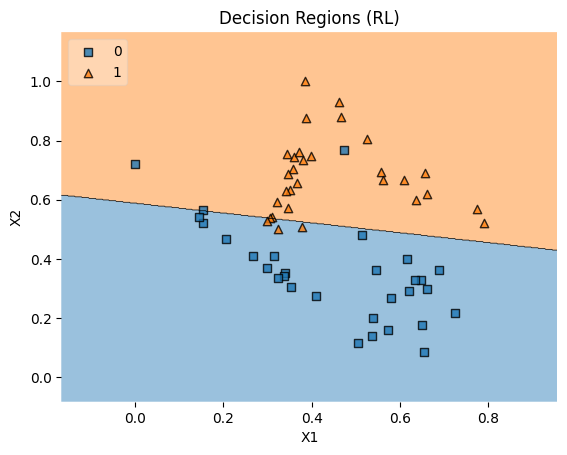

In [ ]:
models = [
    ('knn', KNeighborsClassifier(n_neighbors=5, metric= "euclidean")),
    ('NB', GaussianNB()),
    ('RL', LogisticRegression(max_iter = 1000))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating model from {name} ...")

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}): {round(acc, 2)}")

    plot_decision_regions(X_test, y_test, clf=model, legend=2, zoom_factor=6.0)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Decision Regions ({name})")
    plt.show()

<h2> Referências </h2>

* Lorena, Ana Carolina, João Gama, and Katti Faceli. Inteligência Artificial: Uma abordagem de aprendizado de máquina. Grupo Gen-LTC, 2000.
* Documentação do scikit-learn: https://scikit-learn.org/stable/modules/naive_bayes.html
* Formulação matemática simples: https://en.wikipedia.org/wiki/Naive_Bayes_classifier
